In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
data = pd.read_csv('salary_data_cleaned.csv')
data.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,avg_salary,company_txt,job_state,same_state,age,python_profile,R_profile,spark,aws,excel
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,72.0,Tecolote Research\n,NM,0,47,1,0,0,0,1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,87.5,University of Maryland Medical System\n,MD,0,36,1,0,0,0,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,85.0,KnowBe4\n,FL,1,10,1,0,1,0,1
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,76.5,PNNL\n,WA,1,55,1,0,0,0,0
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,114.5,Affinity Solutions\n,NY,1,22,1,0,0,0,1


- Job title and seniority 
		
-  Fix state Los Angeles 

-  Job description length 

-  Competitor count

- hourly wage to annual 

- remove new line from job title


In [3]:
data.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_profile',
       'R_profile', 'spark', 'aws', 'excel'],
      dtype='object')

In [4]:
def title_simplifier (title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
    
def seniority(title):
    if 'sr'  in title.lower() or 'senior' in title.lower() or 'lead' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
        return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'

In [5]:
data['Job_simp'] =  data['Job Title'].apply(title_simplifier)

In [6]:
data['Job_simp'].value_counts()

data scientist    279
na                184
data engineer     119
analyst           102
manager            22
mle                22
director           14
Name: Job_simp, dtype: int64

In [7]:
data['seniority'] =data['Job Title'].apply(seniority)
data.seniority.value_counts()

na        520
senior    220
jr          2
Name: seniority, dtype: int64

In [8]:
## Fix state Los Angeles
data['job_state'] = data['job_state'].apply(lambda x: x.strip() if x.strip().lower() != 'los angeles' else 'CA')
data['job_state'].value_counts()

CA    152
MA    103
NY     72
VA     41
IL     40
MD     35
PA     33
TX     28
WA     21
NC     21
NJ     17
FL     16
OH     14
TN     13
CO     11
DC     11
IN     10
WI     10
UT     10
MO      9
AZ      9
AL      8
GA      6
DE      6
KY      6
MI      6
IA      5
CT      5
LA      4
OR      4
NE      4
NM      3
KS      3
ID      2
MN      2
RI      1
SC      1
Name: job_state, dtype: int64

In [9]:
data['desc_len'] = data['Job Description'].apply(lambda x: len(x))
data['desc_len']

0      2536
1      4783
2      3461
3      3883
4      2728
       ... 
737    6162
738    6130
739    3078
740    1642
741    3673
Name: desc_len, Length: 742, dtype: int64

In [10]:
data['num_comp'] = data['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1' else 0)

In [11]:
data['Competitors']

0                                                     -1
1                                                     -1
2                                                     -1
3      Oak Ridge National Laboratory, National Renewa...
4                   Commerce Signals, Cardlytics, Yodlee
                             ...                        
737                           Pfizer, AstraZeneca, Merck
738                      See Tickets, TicketWeb, Vendini
739                                                   -1
740                                                   -1
741                                                   -1
Name: Competitors, Length: 742, dtype: object

In [12]:
data['min_salary'] = data.apply(lambda x: x.min_salary*2 if x.hourly ==1 else x.min_salary, axis =1)
data['max_salary'] = data.apply(lambda x: x.max_salary*2 if x.hourly ==1 else x.max_salary, axis =1)

In [13]:
data[data['hourly']==1][['hourly','min_salary','max_salary']]

,hourly,min_salary,max_salary
165,1,34,48
177,1,42,68
197,1,36,50
202,1,42,68
210,1,30,50
246,1,34,48
271,1,42,68
337,1,36,50
345,1,48,78
357,1,42,68


In [14]:
data['company_txt'] = data['company_txt'].apply(lambda x: x.replace('\n', ''))
data['company_txt']

0                          Tecolote Research
1      University of Maryland Medical System
2                                    KnowBe4
3                                       PNNL
4                         Affinity Solutions
                       ...                  
737                                      GSK
738                               Eventbrite
739           Software Engineering Institute
740                             Numeric, LLC
741             Riverside Research Institute
Name: company_txt, Length: 742, dtype: object

In [15]:
data.describe()

,Rating,Founded,hourly,employer_provided,min_salary,max_salary,avg_salary,same_state,age,python_profile,R_profile,spark,aws,excel,desc_len,num_comp
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.618868,1837.154987,0.032345,0.022911,74.719677,128.149596,100.626011,0.557951,46.591644,0.528302,0.002695,0.225067,0.237197,0.522911,3869.545822,1.053908
std,0.801210,497.183763,0.177034,0.149721,30.980593,45.220324,38.855948,0.496965,53.778815,0.499535,0.051882,0.417908,0.425651,0.499812,1521.495868,1.384239
min,-1.000000,-1.000000,0.000000,0.000000,15.000000,16.000000,13.500000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000
25%,3.300000,1939.000000,0.000000,0.000000,52.000000,96.000000,73.500000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2801.000000,0.000000
50%,3.700000,1988.000000,0.000000,0.000000,69.500000,124.000000,97.500000,1.000000,24.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3731.000000,0.000000
75%,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,122.500000,1.000000,59.000000,1.000000,0.000000,0.000000,0.000000,1.000000,4740.000000,3.000000
max,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,1.000000,276.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10051.000000,4.000000


In [16]:
data.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_profile',
       'R_profile', 'spark', 'aws', 'excel', 'Job_simp', 'seniority',
       'desc_len', 'num_comp'],
      dtype='object')

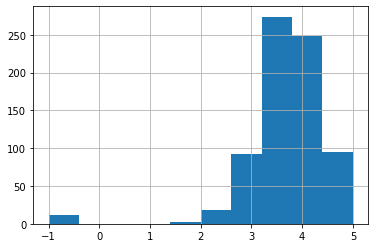

In [17]:
data['Rating'].hist()

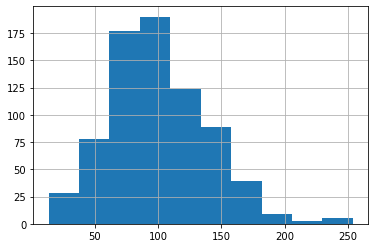

In [18]:
data['avg_salary'].hist()

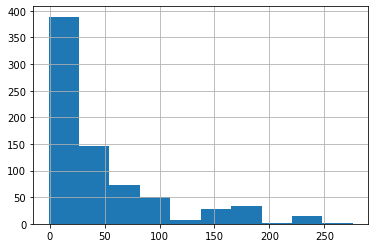

In [19]:
data['age'].hist()

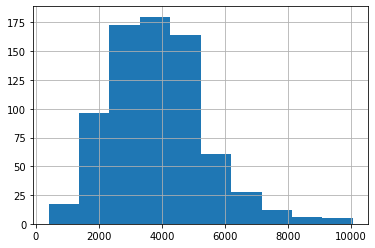

In [20]:
data['desc_len'].hist()

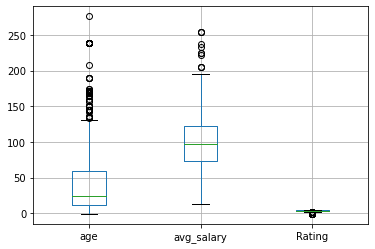

In [21]:
data.boxplot(column = ['age','avg_salary','Rating'])

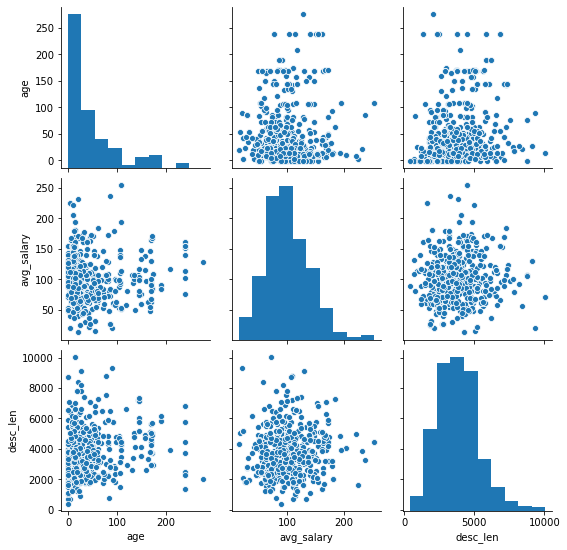

In [22]:
sns.pairplot(vars=['age','avg_salary','desc_len'], data= data)

In [23]:
corr = data[['age','avg_salary','desc_len']].corr()
corr

,age,avg_salary,desc_len
age,1.000000,0.019655,0.163911
avg_salary,0.019655,1.000000,0.078808
desc_len,0.163911,0.078808,1.000000


In [24]:
corr1 = data[['age','avg_salary','desc_len','Rating','num_comp']].corr()
corr1

,age,avg_salary,desc_len,Rating,num_comp
age,1.000000,0.019655,0.163911,0.021655,0.126687
avg_salary,0.019655,1.000000,0.078808,0.013492,0.093813
desc_len,0.163911,0.078808,1.000000,-0.012281,0.104620
Rating,0.021655,0.013492,-0.012281,1.000000,0.027190
num_comp,0.126687,0.093813,0.104620,0.027190,1.000000


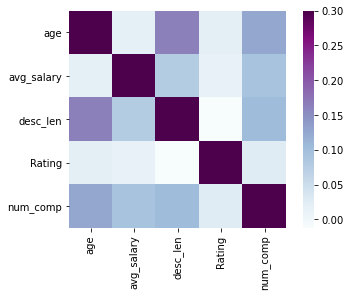

In [25]:
sns.heatmap(corr1, square = True, vmax = 0.3, cmap ='BuPu')

In [26]:
data.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_profile',
       'R_profile', 'spark', 'aws', 'excel', 'Job_simp', 'seniority',
       'desc_len', 'num_comp'],
      dtype='object')

In [27]:
data_cat = data[['Location', 'Headquarters', 'Size','Type of ownership', 'Industry', 'Sector', 'Revenue','company_txt', 'job_state','same_state','python_profile',
       'R_profile','spark', 'aws', 'excel', 'Job_simp', 'seniority' ]]

Graph for Location: Total =200


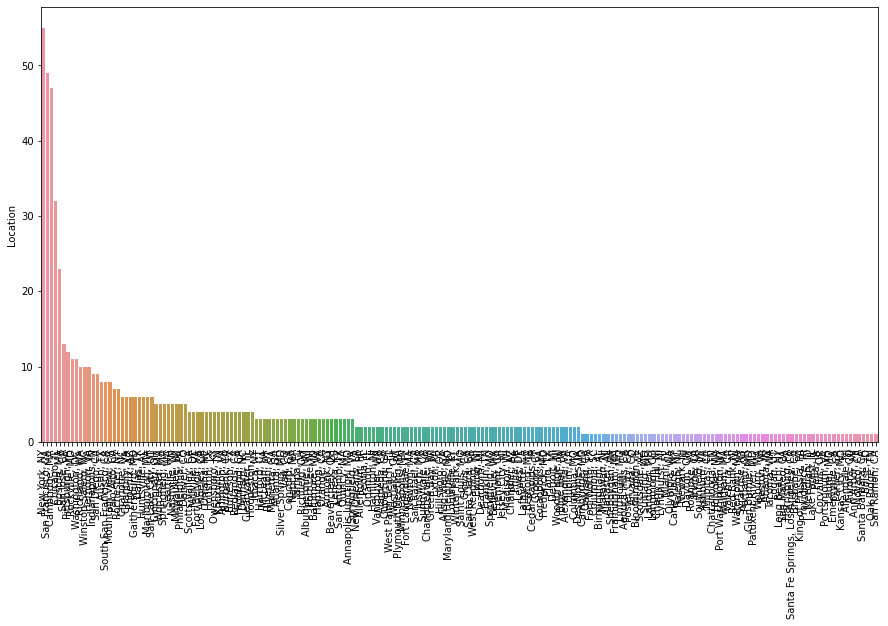

Graph for Headquarters: Total =198


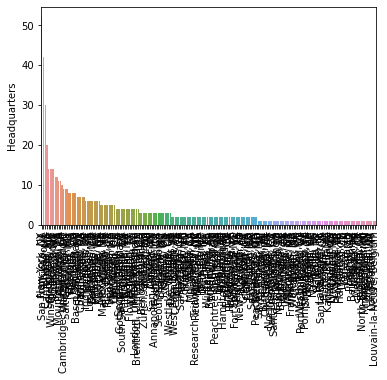

Graph for Size: Total =9


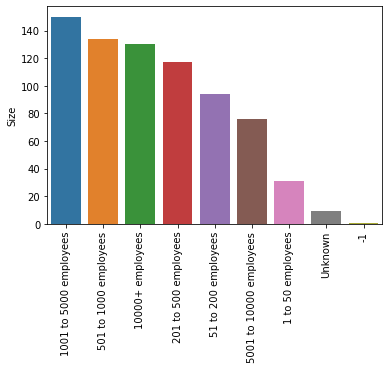

Graph for Type of ownership: Total =11


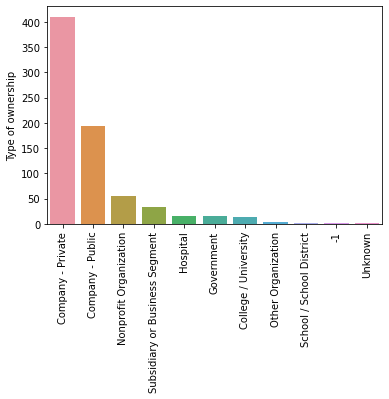

Graph for Industry: Total =60


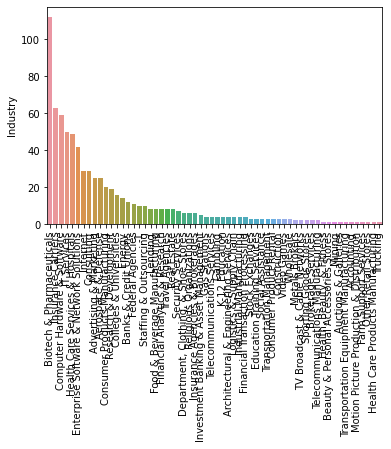

Graph for Sector: Total =25


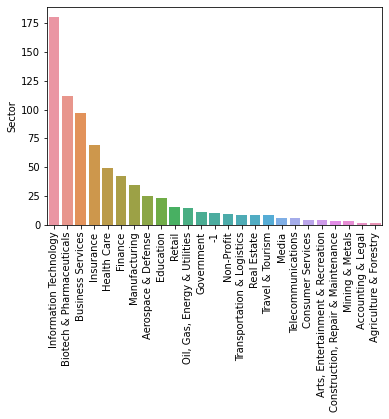

Graph for Revenue: Total =14


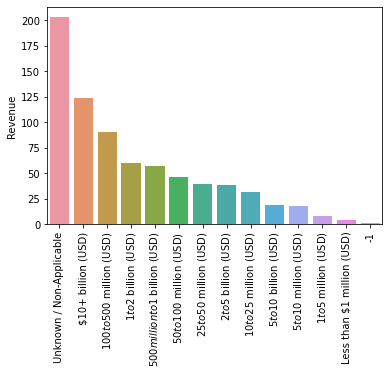

Graph for company_txt: Total =343


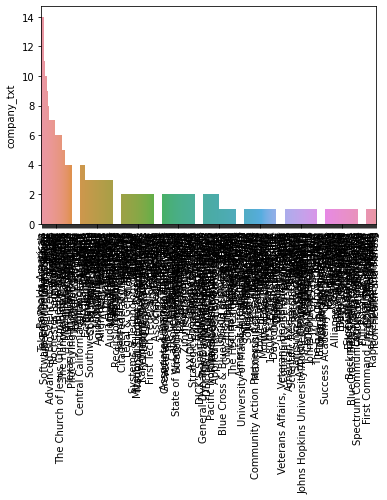

Graph for job_state: Total =37


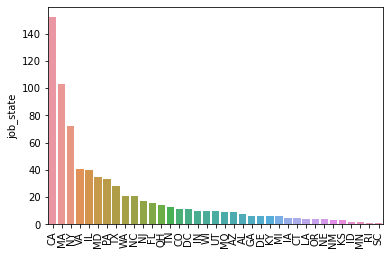

Graph for same_state: Total =2


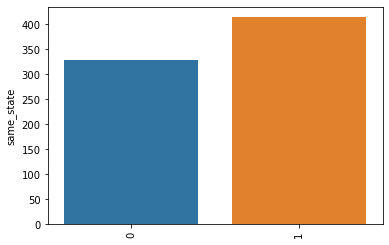

Graph for python_profile: Total =2


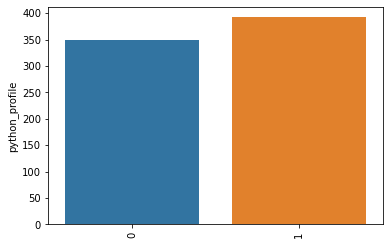

Graph for R_profile: Total =2


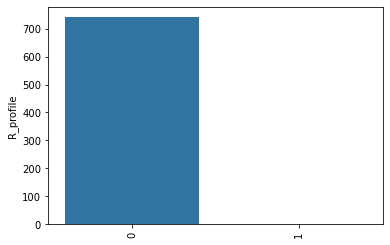

Graph for spark: Total =2


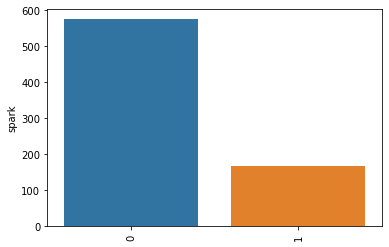

Graph for aws: Total =2


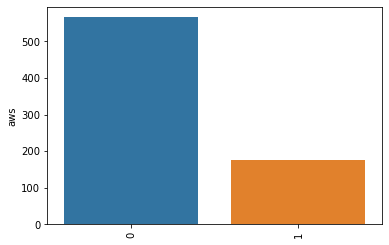

Graph for excel: Total =2


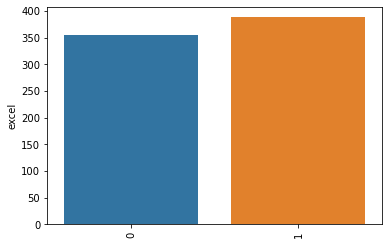

Graph for Job_simp: Total =7


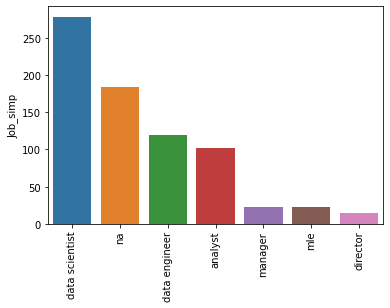

Graph for seniority: Total =3


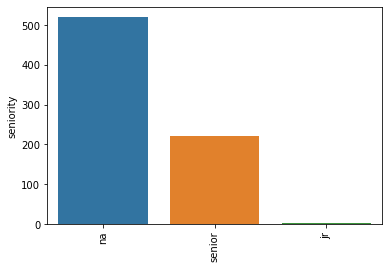

In [28]:
fig = plt.figure(figsize=(15,8))
for i in data_cat.columns:
    cat_num = data_cat[i].value_counts()
    print("Graph for %s: Total =%d" % (i, len(cat_num)))
    Graphs =  sns.barplot(x = cat_num.index, y = cat_num)
    Graphs.set_xticklabels(Graphs.get_xticklabels(), rotation =90)
    plt.show()

Graph for Location: Total =20


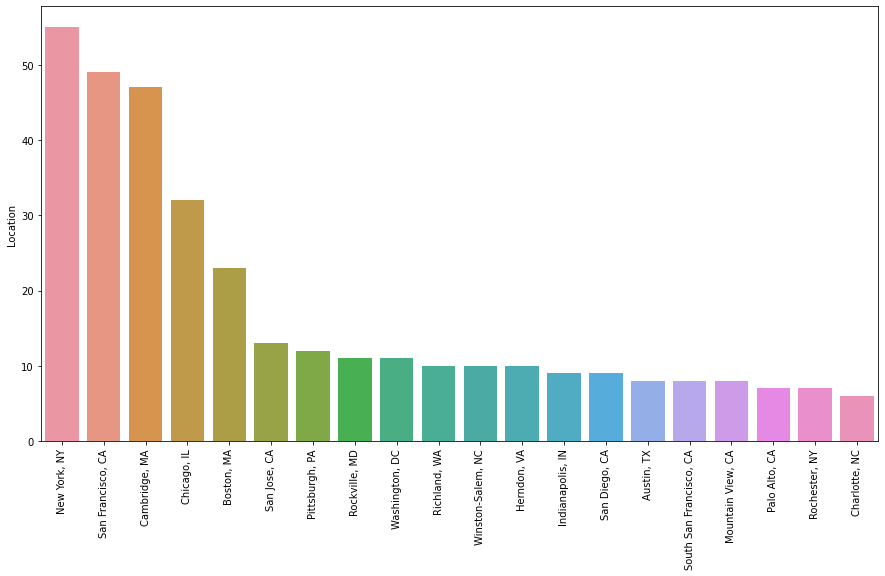

Graph for Headquarters: Total =20


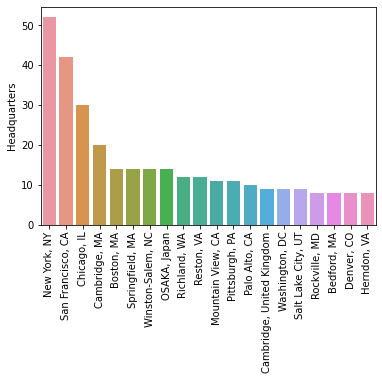

Graph for company_txt: Total =20


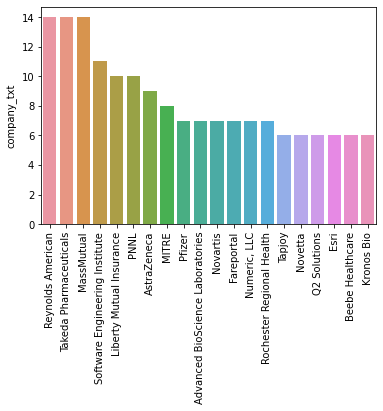

In [29]:
fig = plt.figure(figsize=(15,8))
for i in data_cat[['Location','Headquarters','company_txt']].columns:
    cat_num = data_cat[i].value_counts()[:20]
    print("Graph for %s: Total =%d" % (i, len(cat_num)))
    Graphs =  sns.barplot(x = cat_num.index, y = cat_num)
    Graphs.set_xticklabels(Graphs.get_xticklabels(), rotation =90)
    plt.show()

In [30]:
pd.pivot_table(data, index ='Job_simp', values ='avg_salary')

,avg_salary
Job_simp,
analyst,65.857843
data engineer,105.403361
data scientist,117.564516
director,168.607143
manager,84.022727
mle,126.431818
na,84.853261


In [31]:
pd.pivot_table(data, index =['Job_simp', 'seniority'], values ='avg_salary')

avg_salary
Job_simp       seniority            
analyst        jr          56.500000
               na          61.155405
               senior      79.092593
data engineer  na          96.701220
               senior     124.689189
data scientist jr         106.500000
               na         107.043011
               senior     138.956522
director       na         168.607143
manager        na          84.022727
mle            na         119.133333
               senior     142.071429
na             na          73.988189
               senior     109.061404

In [32]:
pd.pivot_table(data, index =['job_state','Job_simp'], values ='avg_salary')

avg_salary
job_state Job_simp                  
AL        analyst          62.200000
          data engineer    65.000000
          na               43.750000
AZ        analyst          55.000000
          data engineer    79.500000
...                              ...
WA        data scientist   99.764706
          na               97.500000
WI        analyst          58.833333
          data scientist  113.500000
          na               54.000000

[114 rows x 1 columns]

In [33]:
data_pivots = data[['Rating', 'Industry', 'Sector', 'Revenue', 'num_comp', 'hourly', 'employer_provided', 'python_profile','R_profile', 'spark', 'aws', 'excel', 'Type of ownership','avg_salary']]

In [34]:
for i in data_pivots.columns:
    print(i)
    print(pd.pivot_table(data_pivots, index = i, values ='avg_salary').sort_values('avg_salary', ascending= False))

Rating
        avg_salary
Rating            
-1.0    136.181818
 5.0    134.700000
 2.5    120.000000
 4.5    117.714286
 4.1    116.368421
 3.9    113.071429
 2.6    109.083333
 4.4    108.606061
 3.2    105.500000
 4.0    105.340426
 3.5    104.897959
 3.7    104.131148
 4.7    103.983871
 4.3    102.468750
 3.3    101.858974
 4.2    100.442308
 2.2     97.750000
 4.6     97.250000
 3.8     96.811475
 2.1     95.900000
 3.4     93.011364
 1.9     87.500000
 3.1     86.580000
 3.0     85.588235
 3.6     85.467391
 2.8     83.928571
 2.7     83.250000
 2.3     81.500000
 2.9     81.138889
 4.8     80.277778
 2.4     60.214286
Industry
                                          avg_salary
Industry                                            
Other Retail Stores                       163.500000
Motion Picture Production & Distribution  146.000000
Financial Analytics & Research            145.125000
Health, Beauty, & Fitness                 139.500000
Telecommunications Services            

ValueError: Grouper for 'avg_salary' not 1-dimensional

In [ ]:
pd.pivot_table(data_pivots, index = 'Revenue', columns = 'python_profile', values = 'avg_salary', aggfunc = 'count')

In [ ]:
data_out.to_csv('EDA_data.csv', index =False)